In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_filename_csv = "scores_df_n30_all.csv"

In [3]:
df = pd.read_csv(df_filename_csv)

In [4]:
df

,Unnamed: 0,score,algorithm,file,runtime,params_dict,size,nr_entries,nr_entries_original,nr_particles,nr_timesteps,nr_clusters,nr_entries_binned,nr_entries_original_binned
0,0,0.604443,"Spectral, delta",reynolds_100_57.csv,0.011032,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800
1,1,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.011897,{},3000,1200,1600,12,100,4,800,800
2,2,0.732360,"Affinity, delta",reynolds_100_57.csv,0.011365,{},3000,1200,1600,12,100,4,800,800
3,3,0.604443,"Spectral, delta",reynolds_100_57.csv,0.009429,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800
4,4,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.008231,{},3000,1200,1600,12,100,4,800,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3555,1.000000,"Spectral, stddv",reynolds_300_24.csv,0.033278,{'cluster_count': 8},25000,18600,23400,62,300,8,15000,20000
3556,3556,1.000000,"HDBSCAN, stddv",reynolds_300_24.csv,0.032734,{},25000,18600,23400,62,300,8,15000,20000
3557,3557,1.000000,"Affinity, stddv",reynolds_300_24.csv,0.032274,{},25000,18600,23400,62,300,8,15000,20000
3558,3558,0.234135,"ST_HDBSCAN, opt.",reynolds_300_24.csv,7.727665,"{'n_clusters': 8, 'threshold': 0.3, 'eps2': 5}",25000,18600,23400,62,300,8,15000,20000


In [5]:
df = df[~df['algorithm'].str.contains("2std", na=False)]

In [6]:
df["nr_entries"].max()

24000

In [7]:
df["nr_entries_original"].max()

24900

In [8]:
df["nr_entries_binned"].max()

20000

In [9]:
score_df = df.copy()

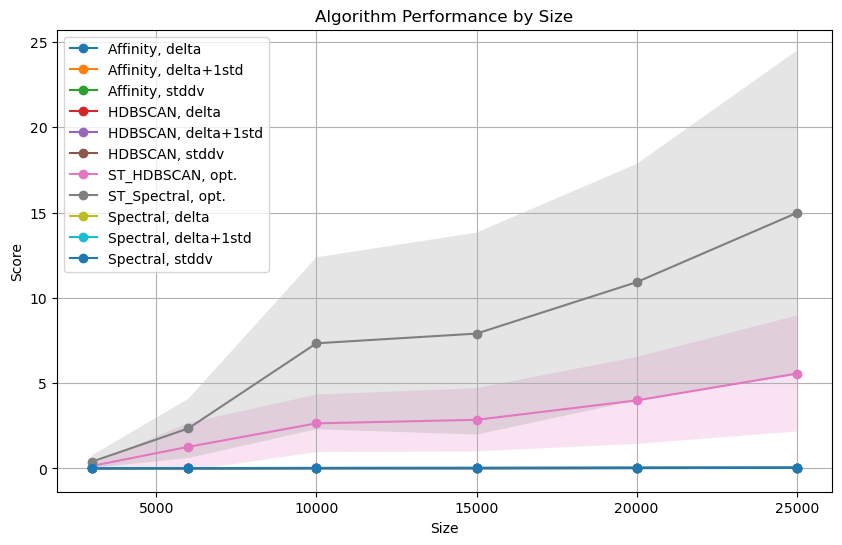

In [10]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
score_df

,Unnamed: 0,score,algorithm,file,runtime,params_dict,size,nr_entries,nr_entries_original,nr_particles,nr_timesteps,nr_clusters,nr_entries_binned,nr_entries_original_binned
0,0,0.604443,"Spectral, delta",reynolds_100_57.csv,0.011032,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800
1,1,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.011897,{},3000,1200,1600,12,100,4,800,800
2,2,0.732360,"Affinity, delta",reynolds_100_57.csv,0.011365,{},3000,1200,1600,12,100,4,800,800
3,3,0.604443,"Spectral, delta",reynolds_100_57.csv,0.009429,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800
4,4,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.008231,{},3000,1200,1600,12,100,4,800,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3555,1.000000,"Spectral, stddv",reynolds_300_24.csv,0.033278,{'cluster_count': 8},25000,18600,23400,62,300,8,15000,20000
3556,3556,1.000000,"HDBSCAN, stddv",reynolds_300_24.csv,0.032734,{},25000,18600,23400,62,300,8,15000,20000
3557,3557,1.000000,"Affinity, stddv",reynolds_300_24.csv,0.032274,{},25000,18600,23400,62,300,8,15000,20000
3558,3558,0.234135,"ST_HDBSCAN, opt.",reynolds_300_24.csv,7.727665,"{'n_clusters': 8, 'threshold': 0.3, 'eps2': 5}",25000,18600,23400,62,300,8,15000,20000


In [12]:
# Function to extract model name based on filename
def get_model(filename):
    if "calovi" in filename:
        return "calovi"
    elif "reynolds" in filename:
        return "reynolds"
    elif "couzin" in filename:
        return "couzin"
    else:
        return "unknown"  # Default if none match

# Apply function to create new column
score_df["model"] = score_df["file"].apply(get_model)

In [13]:
score_df

,Unnamed: 0,score,algorithm,file,runtime,params_dict,size,nr_entries,nr_entries_original,nr_particles,nr_timesteps,nr_clusters,nr_entries_binned,nr_entries_original_binned,model
0,0,0.604443,"Spectral, delta",reynolds_100_57.csv,0.011032,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800,reynolds
1,1,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.011897,{},3000,1200,1600,12,100,4,800,800,reynolds
2,2,0.732360,"Affinity, delta",reynolds_100_57.csv,0.011365,{},3000,1200,1600,12,100,4,800,800,reynolds
3,3,0.604443,"Spectral, delta",reynolds_100_57.csv,0.009429,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800,reynolds
4,4,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.008231,{},3000,1200,1600,12,100,4,800,800,reynolds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3555,1.000000,"Spectral, stddv",reynolds_300_24.csv,0.033278,{'cluster_count': 8},25000,18600,23400,62,300,8,15000,20000,reynolds
3556,3556,1.000000,"HDBSCAN, stddv",reynolds_300_24.csv,0.032734,{},25000,18600,23400,62,300,8,15000,20000,reynolds
3557,3557,1.000000,"Affinity, stddv",reynolds_300_24.csv,0.032274,{},25000,18600,23400,62,300,8,15000,20000,reynolds
3558,3558,0.234135,"ST_HDBSCAN, opt.",reynolds_300_24.csv,7.727665,"{'n_clusters': 8, 'threshold': 0.3, 'eps2': 5}",25000,18600,23400,62,300,8,15000,20000,reynolds


In [14]:
df_calovi = score_df[score_df["model"] == "calovi"]
df_reynolds = score_df[score_df["model"] == "reynolds"]
df_couzin = score_df[score_df["model"] == "couzin"]

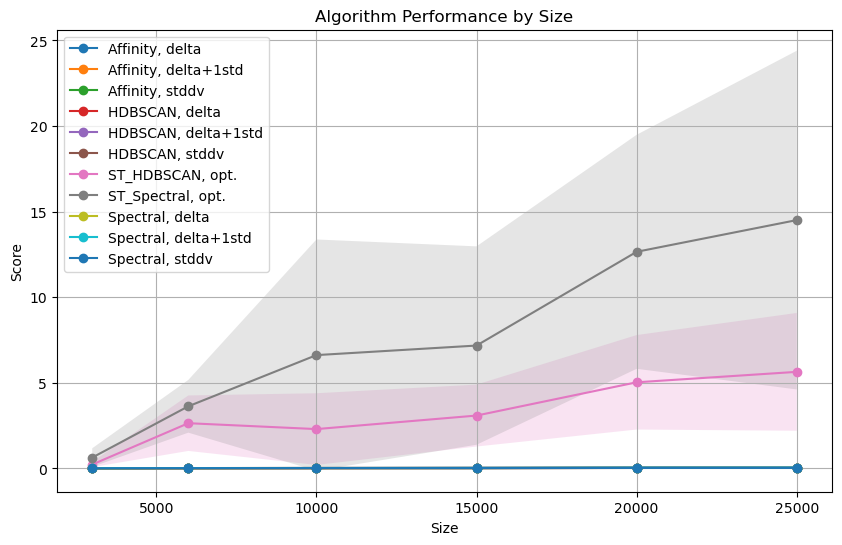

In [19]:
# Group by algorithm and size, calculating mean and std deviation
grouped = df_calovi.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

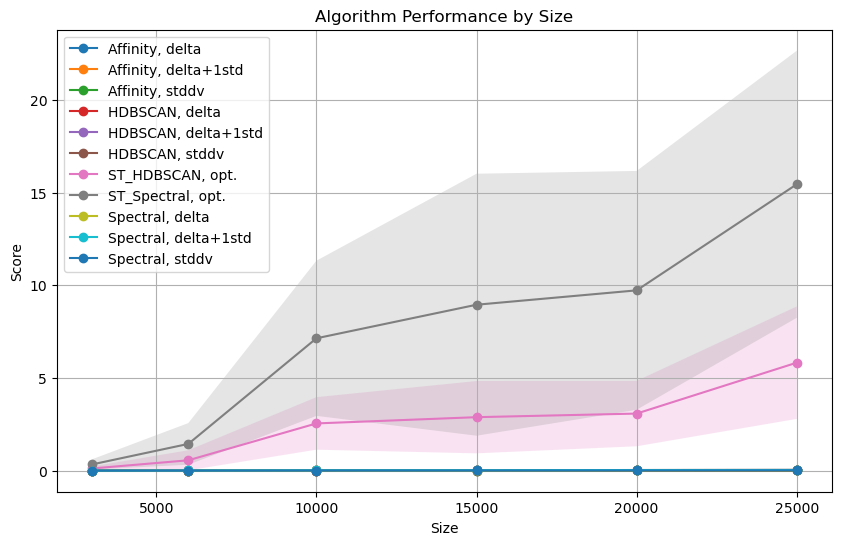

In [23]:
# Group by algorithm and size, calculating mean and std deviation
grouped = df_couzin.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

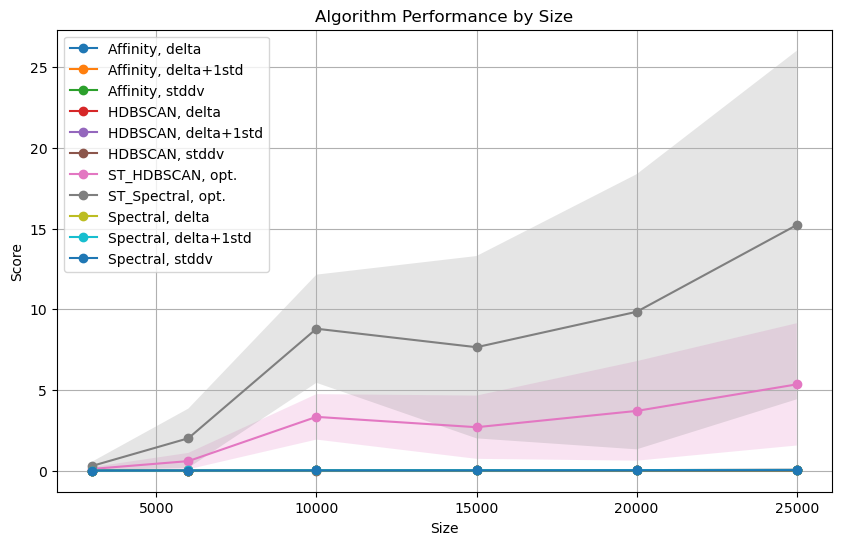

In [24]:
# Group by algorithm and size, calculating mean and std deviation
grouped = df_reynolds.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

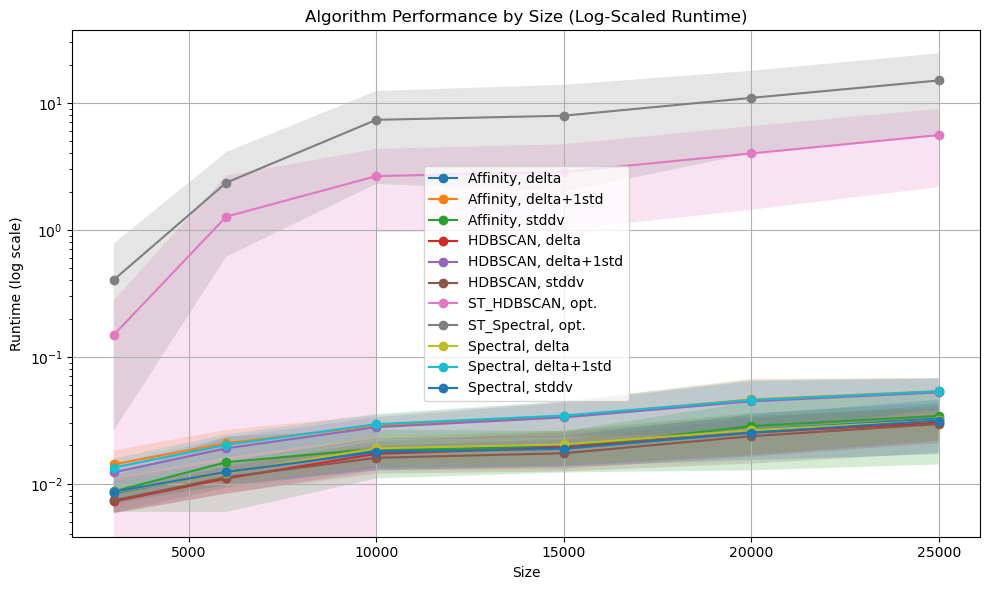

In [36]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

# Set log-scale on y-axis (runtime)
plt.yscale("log")
plt.xlabel("Size")
plt.ylabel("Runtime (log scale)")
plt.title("Algorithm Performance by Size (Log-Scaled Runtime)")

plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()


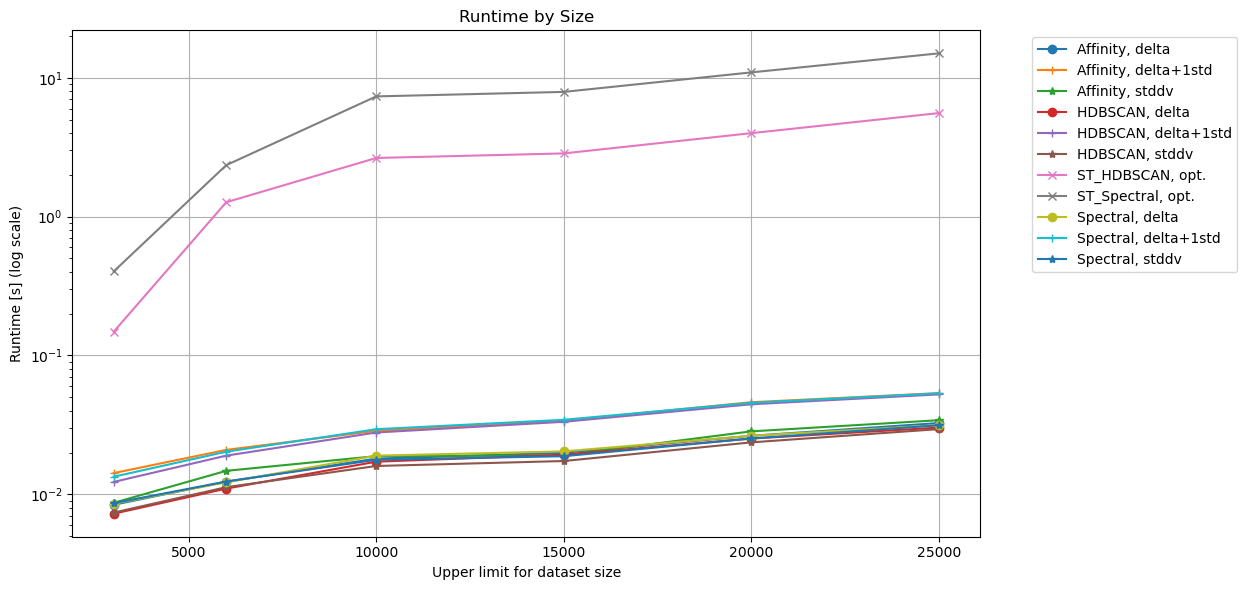

In [44]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    if "ST_" in algo:
        plt.plot(subset["size"], subset["mean"], marker="x", label=algo)
        #plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)
    elif "delta+1" in algo:
        plt.plot(subset["size"], subset["mean"], marker="+", label=algo)
    elif "stddv" in algo:
        plt.plot(subset["size"], subset["mean"], marker="*", label=algo)
    else:
        plt.plot(subset["size"], subset["mean"], marker="o", label=algo)

# Set log-scale on y-axis (runtime)
plt.yscale("log")
plt.xlabel("Upper limit for dataset size")
plt.ylabel("Runtime [s] (log scale)")
plt.title("Runtime by Size")

plt.grid(True)

plt.legend()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


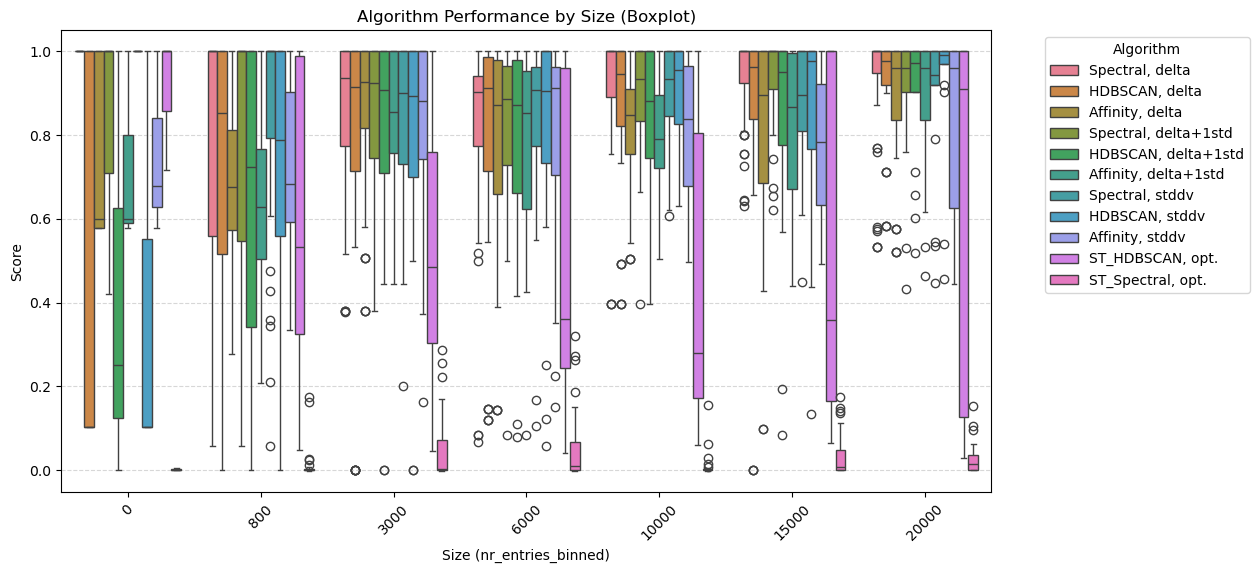

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis_interest = "nr_entries_binned"

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=score_df, x=x_axis_interest, y="score", hue="algorithm")

# Formatting
plt.xlabel("Size (nr_entries_binned)")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size (Boxplot)")
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, axis="y", linestyle="--", alpha=0.5)  # Grid only for Y-axis

# Show plot
plt.show()


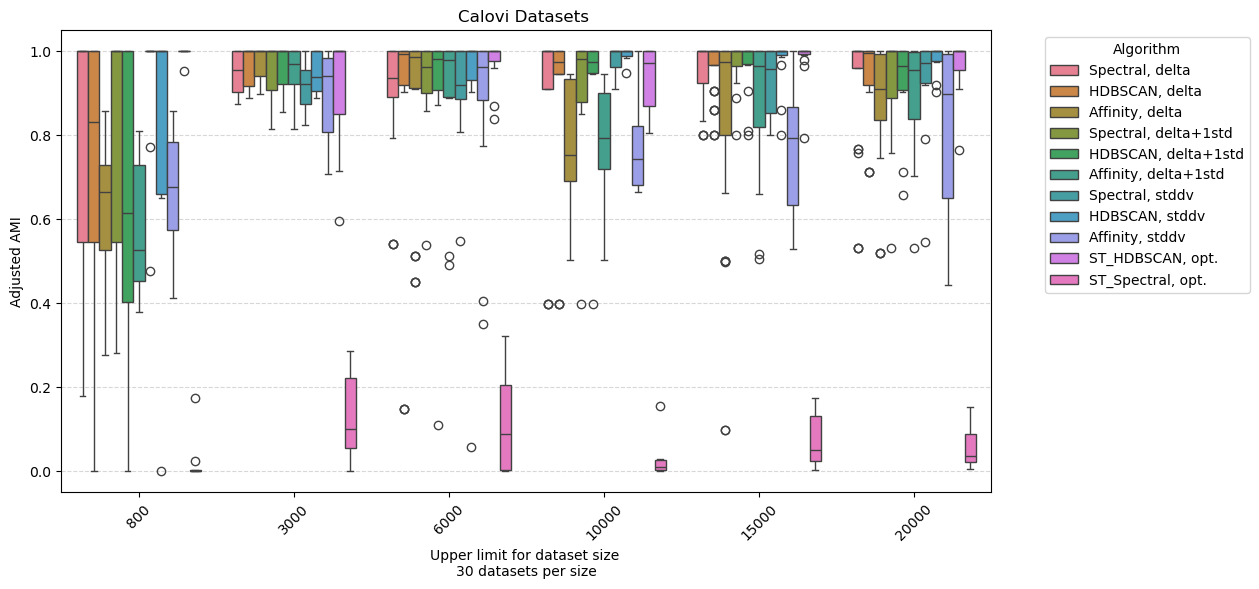

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis_interest = "nr_entries_binned"

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=df_calovi, x=x_axis_interest, y="score", hue="algorithm")

# Formatting
plt.xlabel("Upper limit for dataset size \n 30 datasets per size")
plt.ylabel("Adjusted AMI")
plt.title("Calovi Datasets ")
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, axis="y", linestyle="--", alpha=0.5)  # Grid only for Y-axis

# Show plot
plt.show()


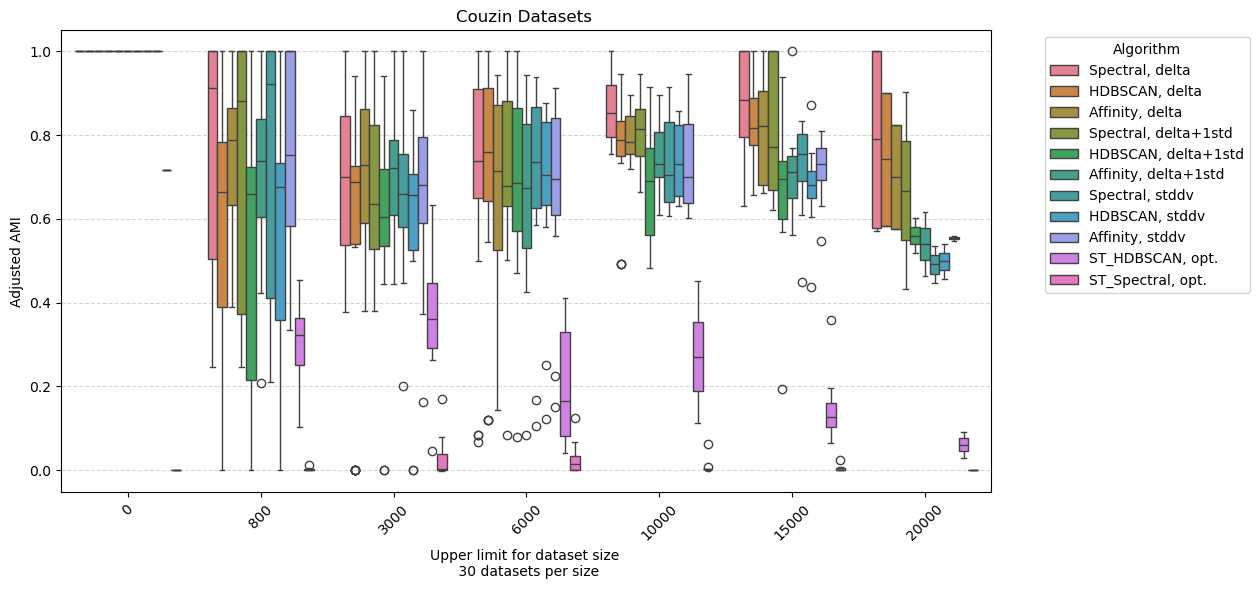

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis_interest = "nr_entries_binned"

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=df_couzin, x=x_axis_interest, y="score", hue="algorithm")

# Formatting
plt.xlabel("Upper limit for dataset size \n 30 datasets per size")
plt.ylabel("Adjusted AMI")
plt.title("Couzin Datasets ")
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, axis="y", linestyle="--", alpha=0.5)  # Grid only for Y-axis

# Show plot
plt.show()


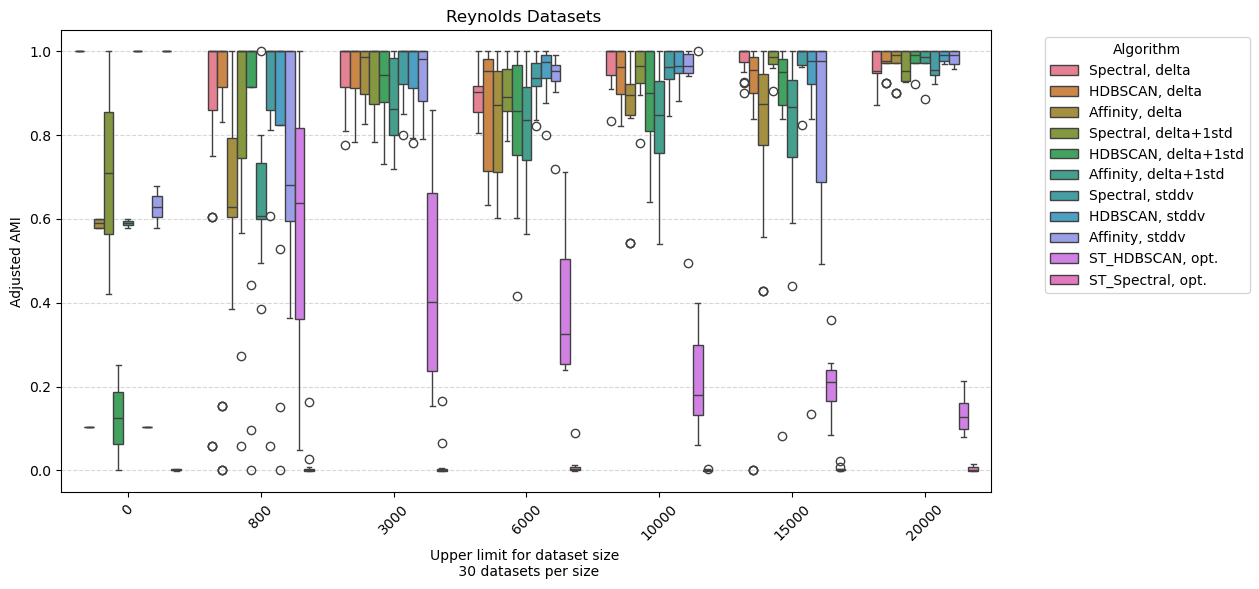

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis_interest = "nr_entries_binned"

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=df_reynolds, x=x_axis_interest, y="score", hue="algorithm")

# Formatting
plt.xlabel("Upper limit for dataset size \n 30 datasets per size")
plt.ylabel("Adjusted AMI")
plt.title("Reynolds Datasets ")
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, axis="y", linestyle="--", alpha=0.5)  # Grid only for Y-axis

# Show plot
plt.show()
